<a href="https://colab.research.google.com/github/Amrapali03/Learn-PyTorch/blob/main/Debugging_of_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recitation 0G: Debugging of Deep Neural Network (Part 1)

##Main purpose of this notebook:
1. How to write sanity check
2. How to visualize image dataset
3. How to visualize speech dataset

We will have a separate recitation to teach you how to visualize the performance and metrics of your deep learning model using **wandb.ai**. \
Here, we focus on visualiztion of data.

## Writing Sanity Check
Similar to normal debugging practice, we want to print information about important variables. \
However, since most variables in machine learning tasks are large and high-dimensional, it is difficult to decide whether the raw data make sense. \
Main things to print in a sanity check: \
  1. Type of the data
  2. Shape of the data
  3. A few instance of the data

## Example 1: Visualizing image data

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

Here, we load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28×28 grayscale image and an associated label from one of 10 classes. \
In this class, you will be playing with even larger datasets, and this is a toy example for you to learn to inspect individual data samples from a big dataset.

In [2]:
# Loading the dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:09<00:00, 2642349.15it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207972.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3862082.60it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5945010.19it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



The Dataset class should store the samples and their corresponding labels. \
Now, we want to write a sanity check to see whether the dataloader is working properly, i.e. whether the samples are 28x28 grayscale image, and whether the labels match the images. \

In [6]:
# Sanity check

# First, load one data sample and its label from the dataset
img, label=training_data[10]

# Print the type and shape
print("Type of data loaded: ",type(img))
print("Shape of data loaded: ", img.shape)
print("Type of label loaded: ", type(label))
print("Value of label loaded: ", label)

Type of data loaded:  <class 'torch.Tensor'>
Shape of data loaded:  torch.Size([1, 28, 28])
Type of label loaded:  <class 'int'>
Value of label loaded:  0


We can see that the data (stored in `img`) is a Tensor of shape 1x28x28 which is as expected. \
And `label` is an integer in the range 0-9 as expected (since there are 10 classes in total). \
Now we want to check whether the image matches the label by:
1. Mapping the label (which is a class number) to the name of the class
2. Plot the image using `matplotlib`, a python library used for graph plotting, extremely useful for data visualization

In [7]:
print(img)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
          0.5569, 0.7843, 0.4157, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.3333, 0.7255, 0.4392, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5961, 0.8392,
          0.8510, 0.7608, 0.9255, 0.8471, 0.7333, 0.5843, 0.5294, 0.6000,
          0.8275, 0.8510, 0.9059, 0.8039, 0.8510, 0.7373, 0.1333, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2588, 0.7255, 0.6510,
          0.7059, 0.7098, 0.7451, 0.8275, 0.8667, 0.7725, 0.5725, 0.7765,
          0.8078, 0.7490, 0.6588, 0.7451, 0.6745, 0.7373, 0.6863, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5294, 0.6000, 0.6275,
          0.6863, 0.7059, 0.6667, 0.7294, 0.7333, 0.7451, 0.7373, 0.7451,
          0.7333, 0.6824, 0.7647, 0.7255, 0.6824, 0.6314,

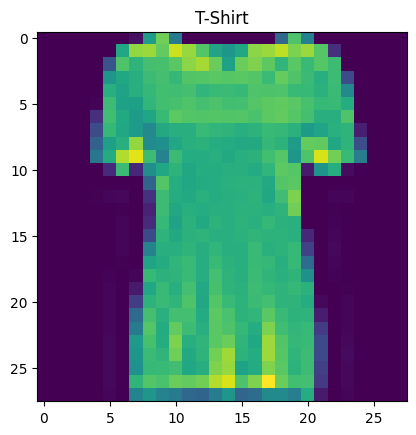

In [8]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

plt.title(labels_map[label])
plt.imshow(img.squeeze())


**Exercise:** Can you visualize the 10th image in the dataset and its label? What type of cloths is it?

In [ ]:
# First, get the 10th data sample and its label from the dataset "training_data"

# done above

In [ ]:
# Print the type and shape of data loaded



In [ ]:
# Plot the image using plt.imshow function



## Example 2: Visualizing speech spectrum (MFCC)

Other than image recognition tasks, you will also be dealing with speech recognition in this class. MFCCs are commonly used as features in speech recognition systems, such as the systems which can automatically recognize numbers spoken into a telephone. \
\
Here, we demonstrate how to load an audio file and visualize its MFCC.

In [9]:
import numpy as np
import wave

# Set the sampling rate and duration
sampling_rate = 16000  # 16 kHz
duration = 10  # seconds

# Calculate the number of samples
num_samples = int(sampling_rate * duration)

# Generate example audio data (replace this with your actual audio data)
audio_data = np.random.randn(num_samples)

# Reshape the audio data to the desired shape
desired_shape = (160000,)  # This should match the desired shape
reshaped_audio_data = np.resize(audio_data, desired_shape)

# Normalize the audio data to the range [-32768, 32767] for 16-bit PCM
normalized_audio_data = np.int16(reshaped_audio_data * 32767)

# Specify the output WAV file path
output_file_path = "output.wav"

# Open the WAV file in write mode
with wave.open(output_file_path, 'w') as wav_file:
    # Set the WAV file parameters
    wav_file.setnchannels(1)  # 1 channel for mono, 2 channels for stereo
    wav_file.setsampwidth(2)  # 2 bytes for 16-bit PCM
    wav_file.setframerate(sampling_rate)
    wav_file.setnframes(len(normalized_audio_data))
    wav_file.writeframes(normalized_audio_data.tobytes())

In [10]:
import torchaudio
import torchaudio.transforms as transforms
import IPython.display as ipd

ipd.Audio("output.wav")

Print the shape of the audio and sampling rate for a sanity check. \
The audio is about 10 seconds, the shape of audio is 1x160000, and the sampling frequency is 16000. Can you see the relationship between these 3 numbers?

In [11]:
(audio, sampling_rate) = torchaudio.load("output.wav")
print("shape of audio: ", audio.shape)
print("sampling rate: ", sampling_rate)

shape of audio:  torch.Size([1, 160000])
sampling rate:  16000


Generating MFCC features and inspect the type and shape:

In [12]:
mfcc_transform = transforms.MFCC(n_mfcc=15, sample_rate=sampling_rate)
mfcc_feat = mfcc_transform(audio) # Note: "feat" stands for feature
print("Type of mfcc_feat: ", type(mfcc_feat))
print("Shape of mfcc_feat: ", mfcc_feat.shape)

Type of mfcc_feat:  <class 'torch.Tensor'>
Shape of mfcc_feat:  torch.Size([1, 15, 801])


/usr/local/lib/python3.10/dist-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


Plot the graph of MFCC coefficients against frame:

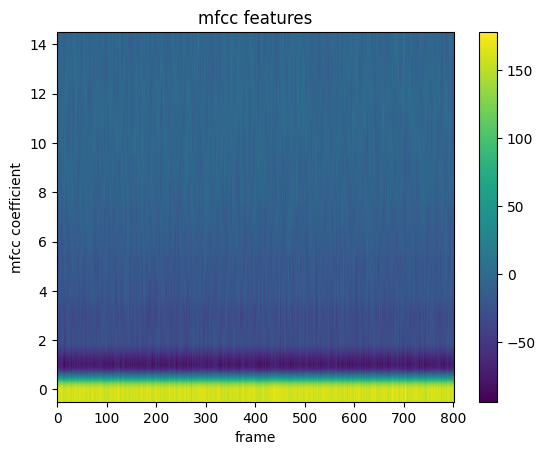

In [13]:
import matplotlib.pyplot as plt
plt.title("mfcc features")
plt.ylabel("mfcc coefficient")
plt.xlabel("frame")
plt.imshow(mfcc_feat.squeeze(), origin="lower", aspect="auto")
# origin="lower" places the [0, 0] index of the array in the lower left corner of the Axes.
# aspect="auto" the Axes is kept fixed and the aspect is adjusted so that the data fit in the Axes.
plt.colorbar()

**Exercise:** analyze the 125BOUNC-mono.wav audio file using the above steps. \
1. Load the audio file and play it to understand what it contains
2. Obtain its MFCC coefficients
3. Plot the MFCC coefficient against frame graph
4. Compare the two MFCC plots, what are the differences and similarities?

In [ ]:
# play the audio file to understand what it contains using ipd.Audio


In [ ]:
# Load the audio file


In [ ]:
# Obtain its MFCC features


In [ ]:
# Plot the graph using the same codes in the demo




# What are the differences and similarities?

## Matplotlib Cheat Sheets:
Obtained from: https://matplotlib.org/cheatsheets/

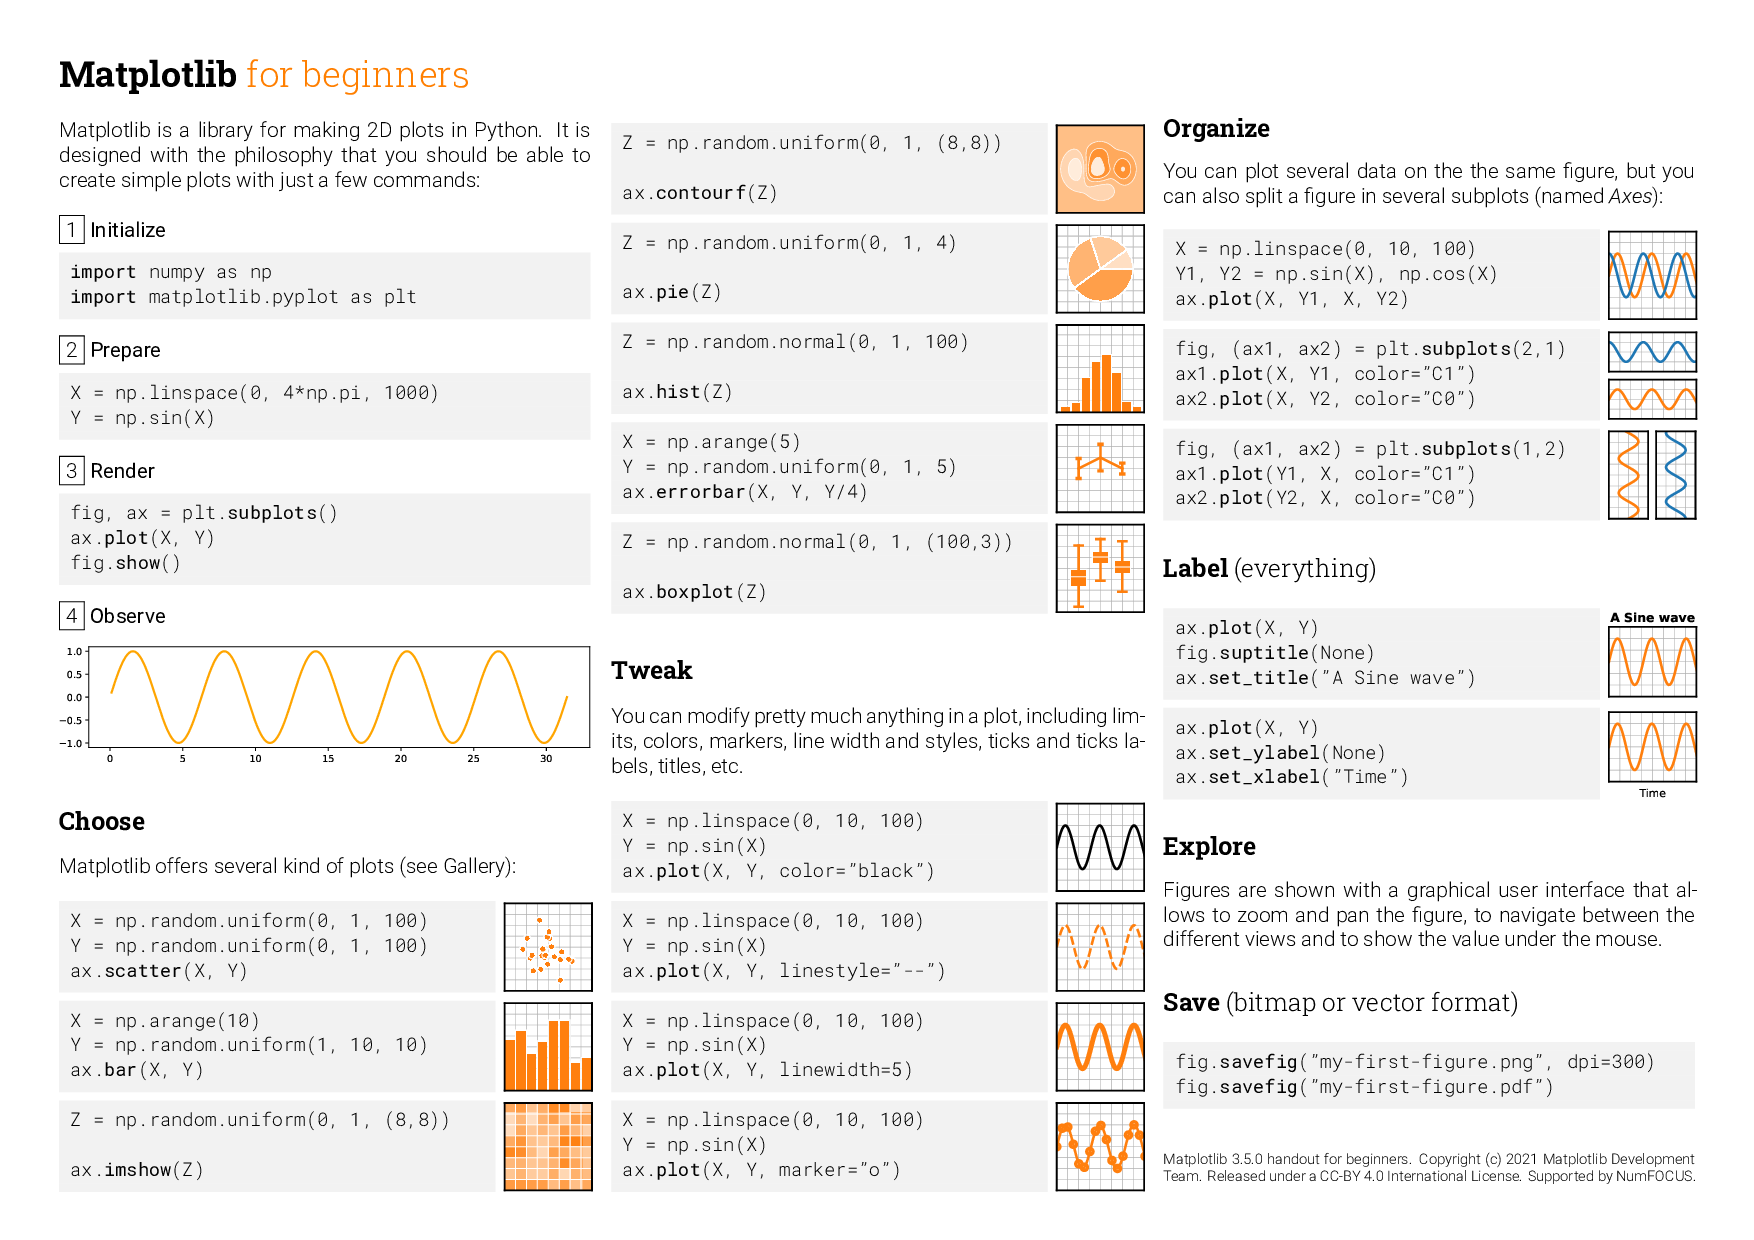